In [1]:
#fbprophet is a open source time series forecasting model........there are many other model -> ARIMA , ...etc but 
#i am going to use fbprophet.....

In [2]:
#PREDICTION -> used to identify or producr 1 outcome 
#FORECASTING -> used to identify many outcomes in series  or range of outcomes..

In [3]:
# pip install prophet
#fbprophet is depricated ,,,,just mention prophet......

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# 1. Loading the 3 csv files

In [5]:
data1 = pd.read_csv(r"D:\crime_rate_forecasting\Chicago_Crimes_2005_to_2007.csv", error_bad_lines=False)

C:\Users\shree\AppData\Local\Temp\ipykernel_22636\2516300573.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data1 = pd.read_csv(r"D:\crime_rate_forecasting\Chicago_Crimes_2005_to_2007.csv", error_bad_lines=False)
Skipping line 533719: expected 23 fields, saw 24



In [6]:
data1

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872338,6254263,4673620,HM269120,04/04/2006 10:00:00 AM,002XX N KOLMAR AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,...,28.0,26.0,08B,1146037.0,1900783.0,2006,04/15/2016 08:55:02 AM,41.883735,-87.739200,"(41.883734918, -87.739199887)"
1872339,6254264,4673621,HM272803,04/04/2006 05:30:00 PM,034XX N MAJOR AVE,1340,CRIMINAL DAMAGE,TO STATE SUP PROP,"SCHOOL, PUBLIC, BUILDING",False,...,38.0,15.0,14,1137757.0,1922269.0,2006,04/15/2016 08:55:02 AM,41.942848,-87.769086,"(41.942848288, -87.769086168)"
1872340,6254265,4673622,HM271989,04/04/2006 06:40:30 PM,081XX S ELLIS AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,VACANT LOT/LAND,False,...,8.0,44.0,04B,1184311.0,1851174.0,2006,04/15/2016 08:55:02 AM,41.746791,-87.600210,"(41.746791148, -87.600209768)"
1872341,6254266,4673623,HM271676,04/04/2006 03:50:00 PM,057XX S COTTAGE GROVE AVE,0460,BATTERY,SIMPLE,STREET,False,...,5.0,41.0,08B,1182559.0,1867082.0,2006,04/15/2016 08:55:02 AM,41.790485,-87.606137,"(41.79048504, -87.606136634)"


In [7]:
data1 = data1.drop(columns=['Unnamed: 0'])

In [8]:
data1

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872338,4673620,HM269120,04/04/2006 10:00:00 AM,002XX N KOLMAR AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,False,...,28.0,26.0,08B,1146037.0,1900783.0,2006,04/15/2016 08:55:02 AM,41.883735,-87.739200,"(41.883734918, -87.739199887)"
1872339,4673621,HM272803,04/04/2006 05:30:00 PM,034XX N MAJOR AVE,1340,CRIMINAL DAMAGE,TO STATE SUP PROP,"SCHOOL, PUBLIC, BUILDING",False,False,...,38.0,15.0,14,1137757.0,1922269.0,2006,04/15/2016 08:55:02 AM,41.942848,-87.769086,"(41.942848288, -87.769086168)"
1872340,4673622,HM271989,04/04/2006 06:40:30 PM,081XX S ELLIS AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,VACANT LOT/LAND,False,False,...,8.0,44.0,04B,1184311.0,1851174.0,2006,04/15/2016 08:55:02 AM,41.746791,-87.600210,"(41.746791148, -87.600209768)"
1872341,4673623,HM271676,04/04/2006 03:50:00 PM,057XX S COTTAGE GROVE AVE,0460,BATTERY,SIMPLE,STREET,False,False,...,5.0,41.0,08B,1182559.0,1867082.0,2006,04/15/2016 08:55:02 AM,41.790485,-87.606137,"(41.79048504, -87.606136634)"


In [9]:
data2 = pd.read_csv(r"D:\crime_rate_forecasting\Chicago_Crimes_2008_to_2011.csv", error_bad_lines=False)
data2 = data2.drop(columns=['Unnamed: 0'])
data2

C:\Users\shree\AppData\Local\Temp\ipykernel_22636\252789437.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data2 = pd.read_csv(r"D:\crime_rate_forecasting\Chicago_Crimes_2008_to_2011.csv", error_bad_lines=False)
Skipping line 1149094: expected 23 fields, saw 41



,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,True,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688705,4780,HP610973,10/06/2008 12:01:00 AM,103XX S AVENUE M,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,10.0,52.0,01A,1201500.0,1837062.0,2008,08/17/2015 03:03:40 PM,41.707648,-87.537704,"(41.707647633, -87.537704247)"
2688706,4781,HP610973,10/06/2008 12:01:00 AM,103XX S AVENUE M,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,10.0,52.0,01A,1201500.0,1837062.0,2008,08/17/2015 03:03:40 PM,41.707648,-87.537704,"(41.707647633, -87.537704247)"
2688707,4782,HP610960,10/05/2008 10:32:00 PM,071XX S WOODLAWN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,CTA BUS,True,False,...,5.0,69.0,01A,1185444.0,1858072.0,2008,08/17/2015 03:03:40 PM,41.765693,-87.595842,"(41.765693367, -87.595841543)"
2688708,4783,HP610516,10/06/2008 05:20:00 PM,015XX S CHRISTIANA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,24.0,29.0,01A,1154284.0,1892229.0,2008,08/17/2015 03:03:40 PM,41.860101,-87.709144,"(41.86010116, -87.709144383)"


In [10]:
data3 = pd.read_csv(r"D:\crime_rate_forecasting\Chicago_Crimes_2012_to_2017.csv", error_bad_lines=False)
data3 = data3.drop(columns=['Unnamed: 0'])
data3

C:\Users\shree\AppData\Local\Temp\ipykernel_22636\2023958126.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data3 = pd.read_csv(r"D:\crime_rate_forecasting\Chicago_Crimes_2012_to_2017.csv", error_bad_lines=False)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"


## 2.concat all these csv files

In [11]:
data = pd.concat([data1,data2,data3])
data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"


In [12]:
#around 6 million data points are available,,,,,each with 22 attributes

# A) find shape of dataset

In [13]:
data.shape

(6017767, 22)

In [14]:
data.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,6.017767e+06,6.017767e+06,6.017678e+06,6.017675e+06,6.015923e+06,5.942885e+06,5.942885e+06,6.017767e+06,5.942885e+06,5.942885e+06
mean,7.037060e+06,1.191230e+03,1.130111e+01,2.265295e+01,3.784779e+01,1.164426e+06,1.885254e+06,2.009371e+03,4.184073e+01,-8.767214e+01
std,1.849589e+06,7.026427e+02,6.933820e+00,1.375739e+01,2.158409e+01,1.792610e+04,3.373090e+04,3.079192e+00,9.285315e-02,6.465034e-02
min,3.012000e+03,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.005000e+03,3.661945e+01,-9.168657e+01
25%,5.499442e+06,6.220000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152773e+06,1.858676e+06,2.007000e+03,4.176759e+01,-8.771446e+01
50%,6.932575e+06,1.034000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.165910e+06,1.889744e+06,2.009000e+03,4.185293e+01,-8.766646e+01
75%,8.359282e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.800000e+01,1.176352e+06,1.909091e+06,2.011000e+03,4.190640e+01,-8.762845e+01
max,1.082788e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 1456713
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

# B) check null values in dataset

In [16]:
data.isnull().sum()

ID                          0
Case Number                 7
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
Beat                        0
District                   89
Ward                       92
Community Area           1844
FBI Code                    0
X Coordinate            74882
Y Coordinate            74882
Year                        0
Updated On                  0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

In [17]:
data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

# C) select only neccessary columns

In [18]:
df = data[['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest', 'Domestic']]
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,OTHER OFFENSE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,NARCOTICS,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,ASSAULT,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,BATTERY,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,NARCOTICS,ALLEY,True,False


In [19]:
df.isnull().sum()

ID                         0
Date                       0
Primary Type               0
Location Description    1974
Arrest                     0
Domestic                   0
dtype: int64

# D) drop the null values

In [20]:
df = df.dropna()

In [21]:
df.isnull().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
dtype: int64

# E) convert Date column type to Date object

In [22]:
df.Date=pd.to_datetime(df.Date , format = '%m/%d/%Y %I:%M:%S %p')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6015793 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(2)
memory usage: 241.0+ MB


# F) find top 10 crime types

In [24]:
df['Primary Type'].value_counts().head(10)

THEFT                  1244395
BATTERY                1079174
CRIMINAL DAMAGE         702696
NARCOTICS               674829
BURGLARY                369053
OTHER OFFENSE           368168
ASSAULT                 360242
MOTOR VEHICLE THEFT     271624
ROBBERY                 229463
DECEPTIVE PRACTICE      223947
Name: Primary Type, dtype: int64

# G) how many criminals are arrested having primary crime type as theft

In [25]:
df[df['Primary Type'] == 'THEFT']['Arrest'].value_counts()

False    1103085
True      141310
Name: Arrest, dtype: int64

In [26]:
#141310 criminals are arrested in the theft type of crime



# H)Find top 10 crime location description

In [27]:
df['Location Description'].value_counts().head(10)

STREET                            1517724
RESIDENCE                          991977
SIDEWALK                           674793
APARTMENT                          668298
OTHER                              216154
PARKING LOT/GARAGE(NON.RESID.)     166331
ALLEY                              137094
SCHOOL, PUBLIC, BUILDING           128852
RESIDENCE-GARAGE                   119619
VEHICLE NON-COMMERCIAL             107554
Name: Location Description, dtype: int64

# I)How many are arrested having location type as STREET

In [28]:
df[df['Location Description'] == 'STREET']['Arrest'].value_counts()

False    1093718
True      424006
Name: Arrest, dtype: int64

Lets make Date column as index for further visualization

In [29]:
df.index = pd.DatetimeIndex(df.Date)
df

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,OTHER OFFENSE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,NARCOTICS,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,ASSAULT,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,BATTERY,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,NARCOTICS,ALLEY,True,False
...,...,...,...,...,...,...
2016-05-03 23:33:00,10508679,2016-05-03 23:33:00,BATTERY,APARTMENT,True,True
2016-05-03 23:30:00,10508680,2016-05-03 23:30:00,CRIMINAL DAMAGE,APARTMENT,True,True
2016-05-03 00:15:00,10508681,2016-05-03 00:15:00,BATTERY,SIDEWALK,False,False


Text(0, 0.5, 'Number of Crimes')

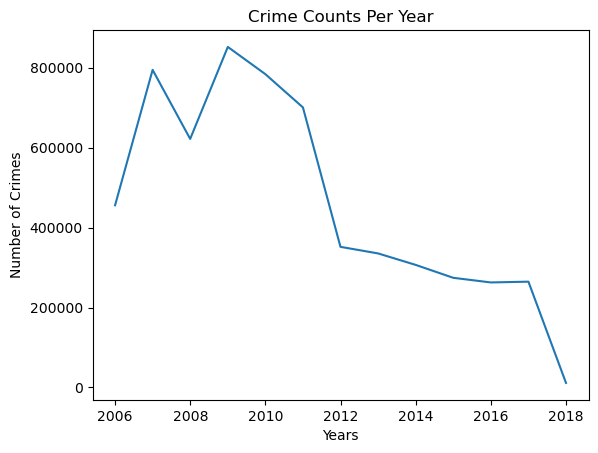

In [30]:
plt.plot(df.resample('Y').size())
#X axis => year
#y axis => crime rates
plt.title('Crime Counts Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

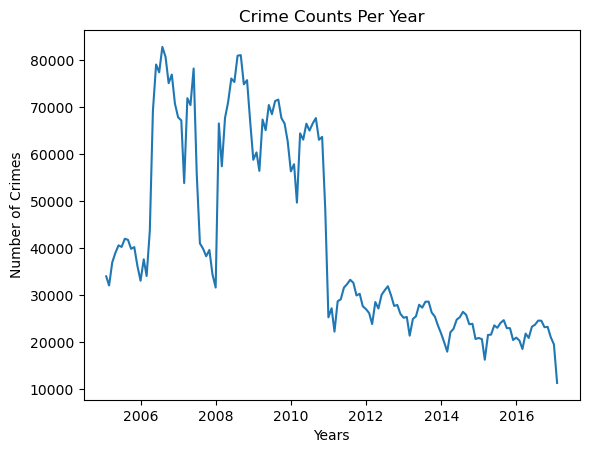

In [31]:
plt.plot(df.resample('M').size())
#X axis => 12 months on each year
#y axis => crime rates
plt.title('Crime Counts Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

# Forecasting (Crime rate Forecasting) starts from here

# 1)prepare data for forecasting

In [32]:
df_prophet = pd.DataFrame(df.resample('M').size().reset_index())

In [33]:
df_prophet
#month wise crime counts ....

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36968
3,2005-04-30,38963
4,2005-05-31,40570
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


In [34]:
df_prophet.head(12)

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36968
3,2005-04-30,38963
4,2005-05-31,40570
5,2005-06-30,40233
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40203


In [35]:
df_prophet.columns=['Date' , 'Crime Count']
df_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36968
3,2005-04-30,38963
4,2005-05-31,40570
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


# 2) Rename the Columns

In [36]:
df_prophet = df_prophet.rename(columns={'Date':'ds' , 'Crime Count':'y'})
df_prophet

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36968
3,2005-04-30,38963
4,2005-05-31,40570
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


# 3) Train the model(fbprophet) 

In [37]:
m = Prophet()
m.fit(df_prophet)

13:40:49 - cmdstanpy - INFO - Chain [1] start processing
13:40:49 - cmdstanpy - INFO - Chain [1] done processing


# 4) make the prediction(time series forecasting....ie;forecasting the crime rates in future that is 2018 onwards

In [38]:
pred = m.make_future_dataframe(periods=24 , freq='M')#predicting trends for next 2 years.....24 months....
#our dataset has crime rates untill 2017 or 2018.......
#thus our fbprophet will predict crime rates for next 2 coming years ie;2018(1 to 12) and 2019(1 to 12)...if our dataset has data till 2017
#else 2019(1 to 12) and 2020(1 to 12)

forcast = m.predict(pred)

In [39]:
forcast
#this forcast or future crime prediction for next 24 months is generated by fbprophet model..

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60513.668250,38964.936901,71637.040535,60513.668250,60513.668250,-4715.633809,-4715.633809,-4715.633809,-4715.633809,-4715.633809,-4715.633809,0.0,0.0,0.0,55798.034441
1,2005-02-28,60381.260925,33494.923852,67177.126400,60381.260925,60381.260925,-9482.143323,-9482.143323,-9482.143323,-9482.143323,-9482.143323,-9482.143323,0.0,0.0,0.0,50899.117602
2,2005-03-31,60234.667100,40982.521972,76297.171704,60234.667100,60234.667100,-1209.480782,-1209.480782,-1209.480782,-1209.480782,-1209.480782,-1209.480782,0.0,0.0,0.0,59025.186318
3,2005-04-30,60092.802109,43991.803923,77553.773234,60092.802109,60092.802109,1173.277170,1173.277170,1173.277170,1173.277170,1173.277170,1173.277170,0.0,0.0,0.0,61266.079279
4,2005-05-31,59946.208284,48465.590724,82631.277764,59946.208284,59946.208284,5476.644657,5476.644657,5476.644657,5476.644657,5476.644657,5476.644657,0.0,0.0,0.0,65422.852941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-09-30,6973.131110,-7687.806991,25966.815667,6641.788908,7311.220259,1814.065181,1814.065181,1814.065181,1814.065181,1814.065181,1814.065181,0.0,0.0,0.0,8787.196291
165,2018-10-31,6568.025474,-8110.347356,26725.349645,6208.454927,6936.616724,2457.922118,2457.922118,2457.922118,2457.922118,2457.922118,2457.922118,0.0,0.0,0.0,9025.947591
166,2018-11-30,6175.987761,-12438.845231,21240.458092,5785.928047,6575.283801,-2014.209016,-2014.209016,-2014.209016,-2014.209016,-2014.209016,-2014.209016,0.0,0.0,0.0,4161.778745
167,2018-12-31,5770.882125,-17447.374553,16523.424014,5358.280071,6205.574895,-5977.865980,-5977.865980,-5977.865980,-5977.865980,-5977.865980,-5977.865980,0.0,0.0,0.0,-206.983855


# 5)visualize the generated forcast

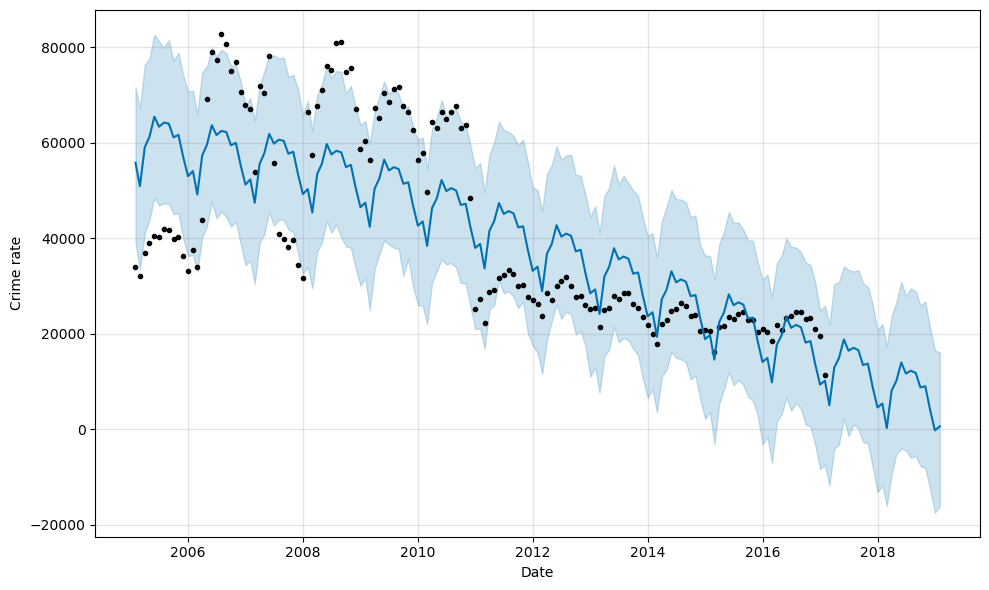

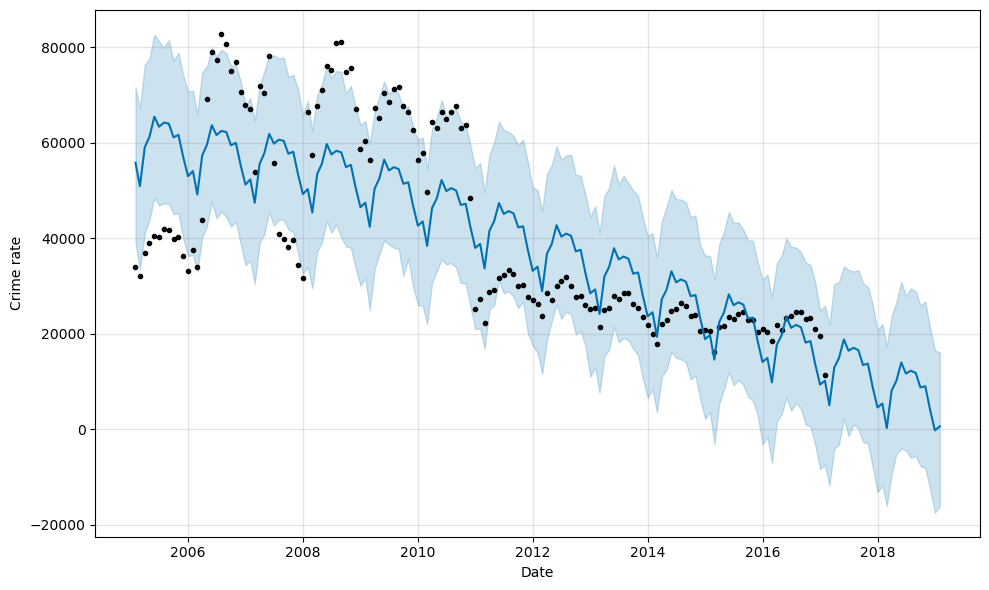

In [40]:
m.plot(forcast,xlabel='Date',ylabel='Crime rate')

In [41]:
#Black dots -> are historical data(past data)  which we given for training (ie;what we imported 3 csv file)
#blue line  -> model prediction
#light blue shadow in background -> 95% confidence interval around the prediction..

In [42]:
#as u see black points are present till 2017.......and our fbprophet model is forcasted the crime rates for 2017 to 2018 and 2018 to 2019
#forcast for 2018 and 2019 is done by our fbprophet model......(2019 is not displayed in grapg,,,but it is there..see forcast dataframe.)

In [43]:
#as u see in next 24 month or 2 year crime rate is going to decreas...


# 6)save the model 

In [44]:
import json
from prophet.serialize import model_to_json , model_from_json


In [45]:
with open('prophet_model.json','w') as fout:
    json.dump(model_to_json(m),fout) #save the model

In [46]:
with open('prophet_model.json','r') as fin:
    m1=model_from_json(json.load(fin)) #load the model

C:\Users\shree\AppData\Roaming\Python\Python311\site-packages\prophet\serialize.py:172: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))


enter no of months to forcast38


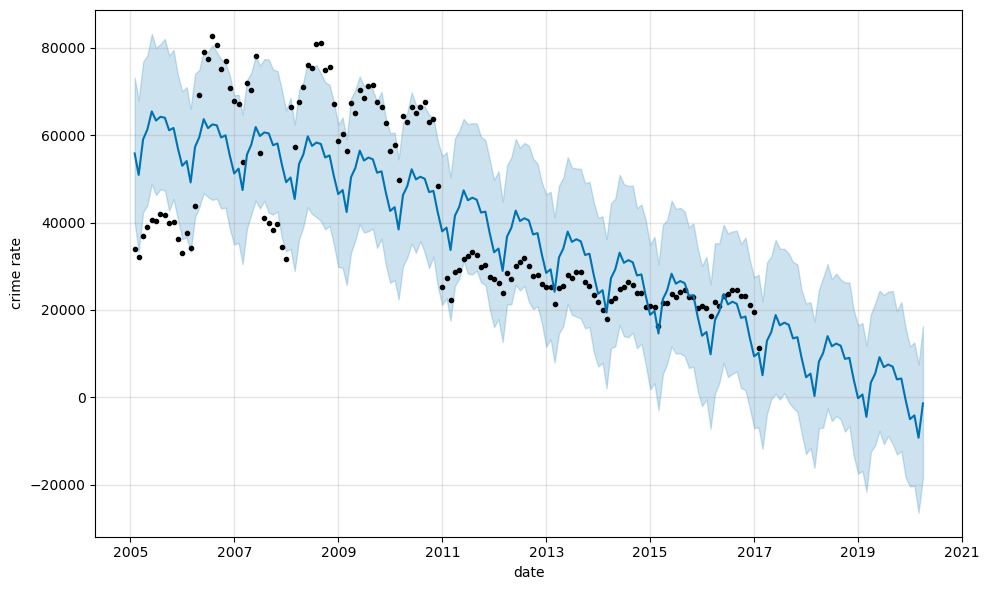

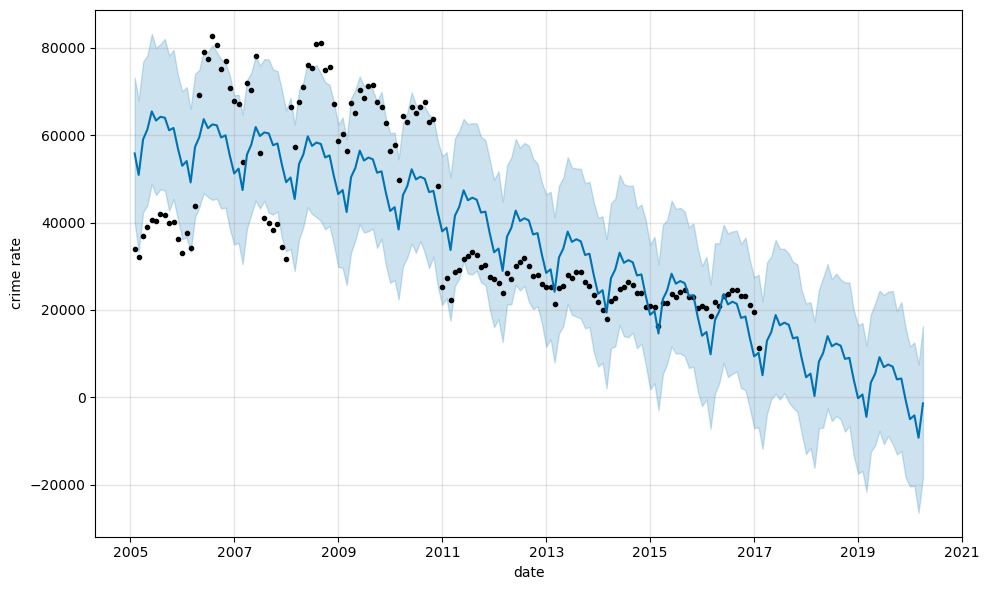

In [47]:
x= int(input('enter no of months to forcast'))
pred2 = m1.make_future_dataframe(periods=x , freq='M')
forcast2 = m1.predict(pred2)
m1.plot(forcast2,xlabel='date',ylabel='crime rate')